In [1]:
import numpy as np
#matplotlib inline
import matplotlib.pyplot as plt
#Import LMfit to minimize chi^2.
import lmfit
from lmfit import Minimizer, Parameters, report_fit
#from lmfit import minimize, Parameters
#Allows me to mess with recursion limit. Default probably 1000. Be careful!
import sys 
# generate random integer values
from random import seed
from random import random
from random import randint
#Numpy randoms give all outputs in arrays.
# from numpy.random import seed
# from numpy.random import randint



In [2]:
#Define constants.
n = 1000000                    #Total number of counts (elastic). 17117
dn = n*(1/np.sqrt(n))       #Uncertainty on total number of counts.
print('dn = ',dn)
Afit = 1                      #Projected asymmetry value from my FF fits. 
loops = 10000
#rand_n = []
nbins = 100

#Define asymmetry with n events with uncertainty dn.
def Asymm(n,dn):
    #asymm = (n/2+dn - (n-(n/2+dn)))/ n
    asymm = 2*dn/ n
    return asymm

print('Asymm = ',Asymm(n,dn))

np.random.normal(n,dn)
print('Random n = ',np.random.normal(n,dn))

dn =  1000.0
Asymm =  0.002
Random n =  1000775.6071141262


10000
10000
10000
Random asymmetry values =  [ 2.71785573e-03  2.44707314e-04 -2.15469003e-03 ... -2.68115185e-04
  9.25467569e-05 -3.82899309e-03]


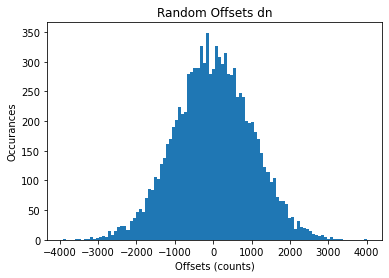

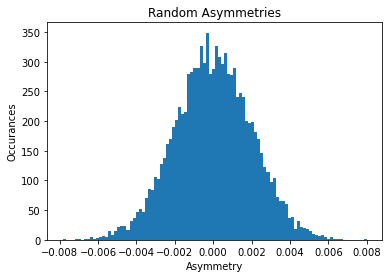

In [3]:
rand_n = []
asymm = []

#Generate random dn values to form an asymmetry.
for i in range(loops):
    rand_n.append(np.random.normal(0,dn))
    #x.append(i)
    
print(loops)  
print(len(rand_n))
#print(len(x))
#print(rand_n)

for i in range(loops):
    asymm = Asymm(n,np.asarray(rand_n))
    
#print(rand_n)
print(len(asymm))
print('Random asymmetry values = ',asymm)

(hn,hbins,patches) = plt.hist(rand_n, nbins)
plt.title('Random Offsets dn')
plt.xlabel('Offsets (counts)')
plt.ylabel('Occurances')
plt.show()

#print(len(hn))
#print(hn)
#print(len(hbins))
#print(hbins)
    
(hn_asymm,hbins_asymm,patches_asymm) = plt.hist(asymm, nbins)
plt.title('Random Asymmetries')
plt.xlabel('Asymmetry')
plt.ylabel('Occurances')
plt.show()

#print(len(hn_asymm))
#print(hn_asymm)
#print(len(hbins_asymm))
#print(hbins_asymm)
#print(hbins_asymm[0])
    
#print('Is hn_asymm a list = ',isinstance(hn_asymm, list))
#print('Is x a list = ',isinstance(x, list))
#isinstance(x, list)

file1 = open("Asymmetry_Uncertainty.txt","w") 
for i in range(len(hn_asymm)):
    file1.write(str((hbins_asymm[i]+hbins_asymm[i+1])/2))
    file1.write(' ')
    file1.write(str(hn_asymm[i]))
    file1.write('\n')
file1.close() 

x,y = np.loadtxt('Asymmetry_Uncertainty.txt', skiprows=0, unpack=True)
#print(x)
#print(y)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 100
    # variables        = 3
    chi-square         = 9496.82376
    reduced chi-square = 97.9053996
    Akaike info crit   = 461.354249
    Bayesian info crit = 469.169760
[[Variables]]
    sigma:      0.00200497 +/- 1.8773e-05 (0.94%) (init = 0.002141368)
    center:     7.4630e-06 +/- 1.8773e-05 (251.54%) (init = 7.929677e-05)
    amplitude:  1.58684000 +/- 0.01286723 (0.81%) (init = 2.242013)
    fwhm:       0.00472134 +/- 4.4207e-05 (0.94%) == '2.3548200*sigma'
    height:     315.744516 +/- 2.56028331 (0.81%) == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(sigma, amplitude) =  0.577



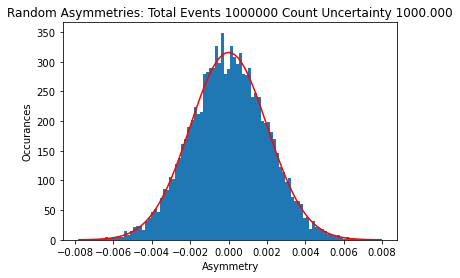

In [4]:
#Import lmfit Model for the least squares minimization.
from lmfit import Model
from lmfit.models import GaussianModel
mod = GaussianModel()

#pars = mod.guess(np.asarray(hn_asymm), np.asarray(x)=np.asarray(x))
#out = mod.fit(np.asarray(hn_asymm), pars, np.asarray(x)=np.asarray(x))

#isinstance(hn_asymm, list)

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)
print(out.fit_report(min_correl=0.25))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

mu = 0
sig = 1

#x_values = np.linspace(-1, 1, 100)
#plt.plot(x_values, gaussian(x_values, mu, sig))
#plt.show()

plt.plot(x, out.best_fit, 'r-')
plt.hist(asymm, nbins)
plt.title('Random Asymmetries: Total Events %.f Count Uncertainty %.3f' %(n,n*(1/np.sqrt(n))))
plt.xlabel('Asymmetry')
plt.ylabel('Occurances')
plt.show()
#print(out.variables())